EDA 1

Title: Bike Details Dataset

Question 1 - What is the range of selling prices in the dataset?

In [ ]:
#Answer 1
import pandas as pd

# Load the uploaded dataset to examine its structure
file_path = '/content/BIKE DETAILS.csv'
bike_data = pd.read_csv(file_path)

# Display the first few rows and column names to understand the structure of the dataset
bike_data.head(), bike_data.columns


(                                  name  selling_price  year seller_type  \
 0            Royal Enfield Classic 350         175000  2019  Individual   
 1                            Honda Dio          45000  2017  Individual   
 2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
 3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
 4                Yamaha SZ [2013-2014]          20000  2011  Individual   
 
        owner  km_driven  ex_showroom_price  
 0  1st owner        350                NaN  
 1  1st owner       5650                NaN  
 2  1st owner      12000           148114.0  
 3  1st owner      23000            89643.0  
 4  2nd owner      21000                NaN  ,
 Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
        'ex_showroom_price'],
       dtype='object'))

In [ ]:
# Calculate the range of selling prices
selling_price_min = bike_data['selling_price'].min()
selling_price_max = bike_data['selling_price'].max()

selling_price_min, selling_price_max


(5000, 760000)

Question 2 - What is the median selling price for bikes in the dataset?




In [ ]:
#Answer 2
# Calculate the median selling price
selling_price_median = bike_data['selling_price'].median()
selling_price_median


45000.0

Question 3 - What is the most common seller type?

In [ ]:
#Answer 3
# Find the most common seller type
most_common_seller_type = bike_data['seller_type'].mode()[0]
most_common_seller_type


'Individual'

Question 4 - How many bikes have driven more than 50000 kilometers?

In [ ]:
#Answer 4
# Count the number of bikes that have driven more than 50,000 kilometers
bikes_over_50k_km = bike_data[bike_data['km_driven'] > 50000].shape[0]
bikes_over_50k_km


170

Question 5 - What is the average km_driven value for each ownership type?

In [ ]:
#Answer 5
# Calculate the average kilometers driven for each ownership type
average_km_by_owner = bike_data.groupby('owner')['km_driven'].mean()
average_km_by_owner


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


Question 6 - What proportion of bikes are from the year 2015 or older?

In [ ]:
#Answer 6
# Calculate the proportion of bikes from the year 2015 or older
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]
total_bikes = bike_data.shape[0]
proportion_2015_or_older = bikes_2015_or_older / total_bikes
proportion_2015_or_older


0.5664467483506126

Question 7 - What is the trend of missing values across the dataset?

In [ ]:
#Answer 7
# Identify the trend of missing values across the dataset
missing_values = bike_data.isnull().sum()
missing_values_percentage = (missing_values / bike_data.shape[0]) * 100

# Combine the counts and percentages for better insight
missing_values_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_values_percentage
})

missing_values_summary


,Missing Count,Percentage
name,0,0.000000
selling_price,0,0.000000
year,0,0.000000
seller_type,0,0.000000
owner,0,0.000000
km_driven,0,0.000000
ex_showroom_price,435,40.999057


Question 8 - What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
#Answer 8
# Find the highest ex_showroom_price and the corresponding bike name
highest_ex_showroom_price = bike_data['ex_showroom_price'].max()
bike_with_highest_price = bike_data[bike_data['ex_showroom_price'] == highest_ex_showroom_price]['name'].values

highest_ex_showroom_price, bike_with_highest_price


(1278000.0, array(['Harley-Davidson Street Bob'], dtype=object))

Question 9 - What is the total number of bikes listed by each seller type?

In [ ]:
#Answer 9
# Calculate the total number of bikes listed by each seller type
bikes_by_seller_type = bike_data['seller_type'].value_counts()
bikes_by_seller_type


,count
seller_type,
Individual,1055
Dealer,6


Question 10 - What is the relationship between selling_price and km_driven for first-owner bikes?

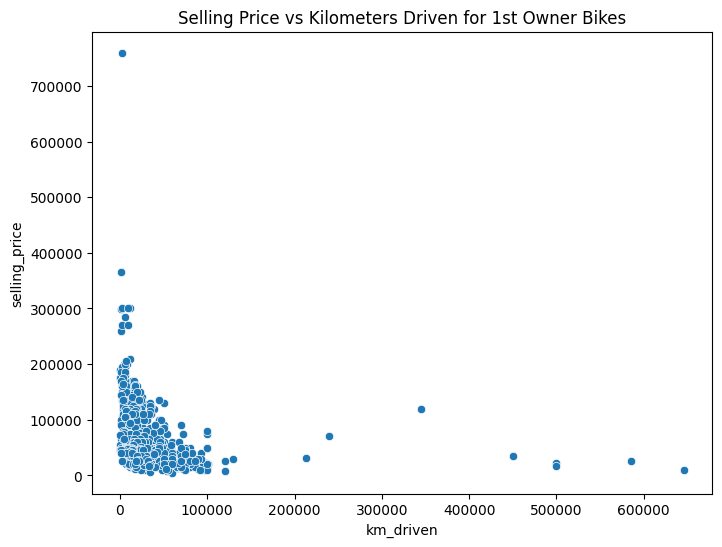

Correlation between km_driven and selling_price: -0.24


In [ ]:
#Answer 10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load your dataset (replace with your actual dataset path)
df = pd.read_csv('/content/BIKE DETAILS.csv')

# Filter the dataset for first-owner bikes
df_1st_owner = df[df['owner'] == '1st owner']

# Visualize the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df_1st_owner)
plt.title('Selling Price vs Kilometers Driven for 1st Owner Bikes')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()
# Compute the correlation between km_driven and selling_price
correlation, _ = pearsonr(df_1st_owner['km_driven'], df_1st_owner['selling_price'])
print(f"Correlation between km_driven and selling_price: {correlation:.2f}")


Question 11 - Identify and remove outliers in the km_driven column using the IQR method?


In [ ]:
#Answer 11
import pandas as pd

# Load your dataset (replace with your actual dataset path)
df = pd.read_csv('/content/BIKE DETAILS.csv')

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers in km_driven
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Optional: Display the number of rows before and after removing outliers
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")

# Save the cleaned dataset if needed
# df_cleaned.to_csv('cleaned_dataset.csv', index=False)


Original dataset size: 1061
Cleaned dataset size: 1022


Question 12 - Perform a bivariate analysis to visualize the relationship between year and selling_price.

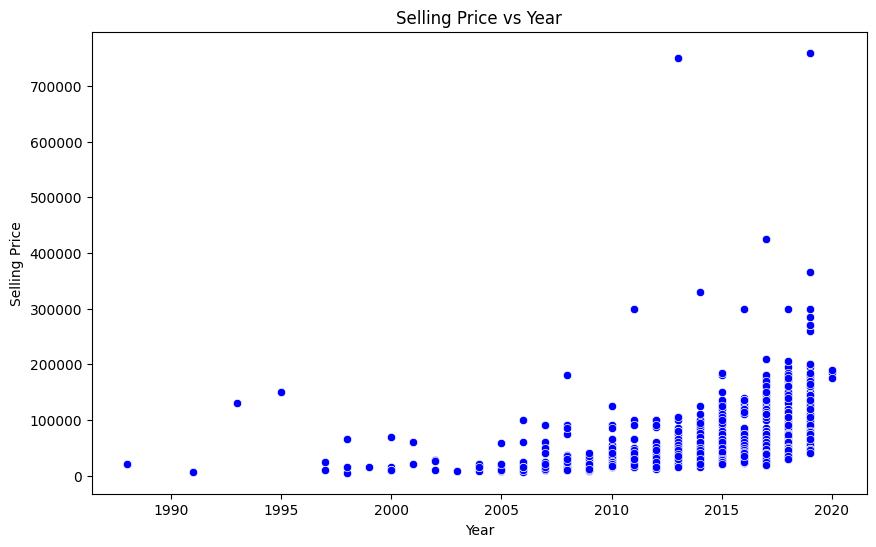

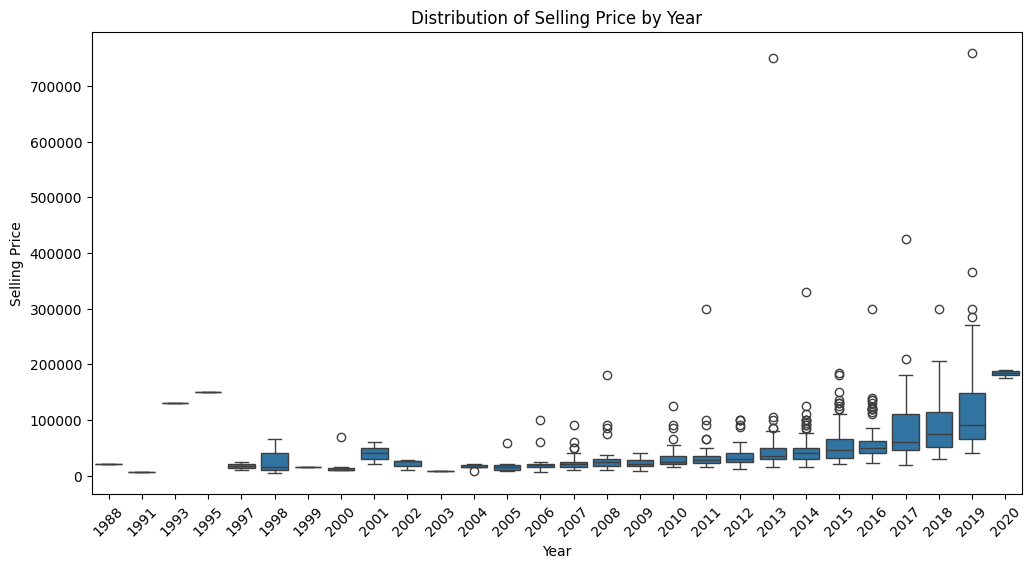

<ipython-input-31-978fd623e6fe>:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='selling_price', data=df, estimator='mean', ci=None)


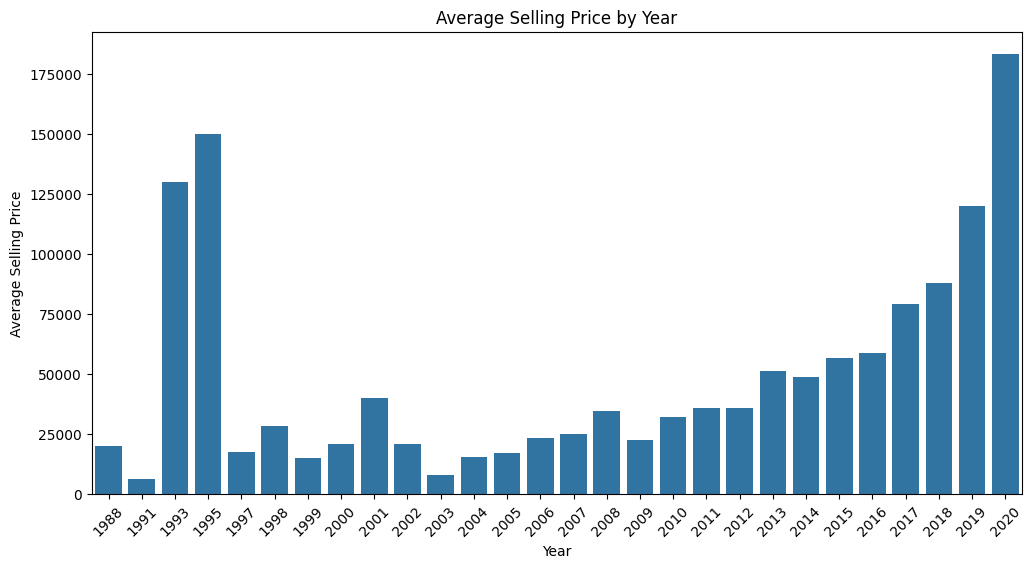

In [ ]:
#Answer 12
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/BIKE DETAILS.csv')

# Scatter plot to visualize the relationship between 'year' and 'selling_price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df, color='blue')
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

# Box plot to visualize the distribution of 'selling_price' for each 'year'
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Distribution of Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

# Bar plot to visualize the average 'selling_price' for each 'year'
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='selling_price', data=df, estimator='mean', ci=None)
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()


Question 13 - What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?

In [ ]:
#Answer 13
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/BIKE DETAILS.csv')

# Assuming 'year' is the manufacturing year and 'selling_price' is the current selling price

# Get the current year (2025 in this case)
current_year = 2025

# Calculate the bike's age
df['age'] = current_year - df['year']

# Calculate depreciation (assuming the original price is available in 'original_price')
# If 'original_price' is not available, depreciation can't be calculated, but we can still calculate depreciation rate based on age.
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Calculate the average depreciation by bike age
avg_depreciation_by_age = df.groupby('age')['depreciation'].mean().reset_index()

# Display the result
print(avg_depreciation_by_age)


    age  depreciation
0     5 -34260.000000
1     6   2954.562500
2     7  13023.194805
3     8  22306.082353
4     9  28328.190476
5    10  28013.275000
6    11  34505.606061
7    12  43086.886792
8    13  37317.648649
9    14  47102.666667
10   15  45658.928571
11   16  38227.785714
12   17  54732.428571
13   18  42399.000000
14   19  39664.500000
15   20  44852.000000
16   21  36852.000000
17   22           NaN
18   23           NaN
19   24  34852.000000
20   25           NaN
21   26           NaN
22   27           NaN
23   28           NaN
24   30           NaN
25   32           NaN
26   34           NaN
27   37           NaN


Question 14 - Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
#Answer 14
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/BIKE DETAILS.csv')

# Calculate the average selling price for each manufacturing year
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

# Merge the average prices back into the original dataframe
df = pd.merge(df, avg_price_by_year, on='year', suffixes=('', '_avg'))

# Define a threshold for "significantly above average" (e.g., 1.5 times the average price)
threshold = 1.5

# Identify bikes priced significantly above the average price for their manufacturing year
df['price_above_avg'] = df['selling_price'] > (threshold * df['selling_price_avg'])

# Get the names of bikes that are priced significantly above average
bikes_above_avg = df[df['price_above_avg']]['name']

# Display the bike names
print(bikes_above_avg)


2       Royal Enfield Classic Gunmetal Grey
7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
18      Royal Enfield Classic Gunmetal Grey
23                            Jawa Standard
                       ...                 
979               Royal Enfield Thunder 500
981               Royal Enfield Thunder 350
983               Royal Enfield Classic 350
984               Royal Enfield Classic 500
985               Royal Enfield Classic 500
Name: name, Length: 157, dtype: object


Question 15 - Develop a correlation matrix for numeric columns and visualize it using a heatmap.

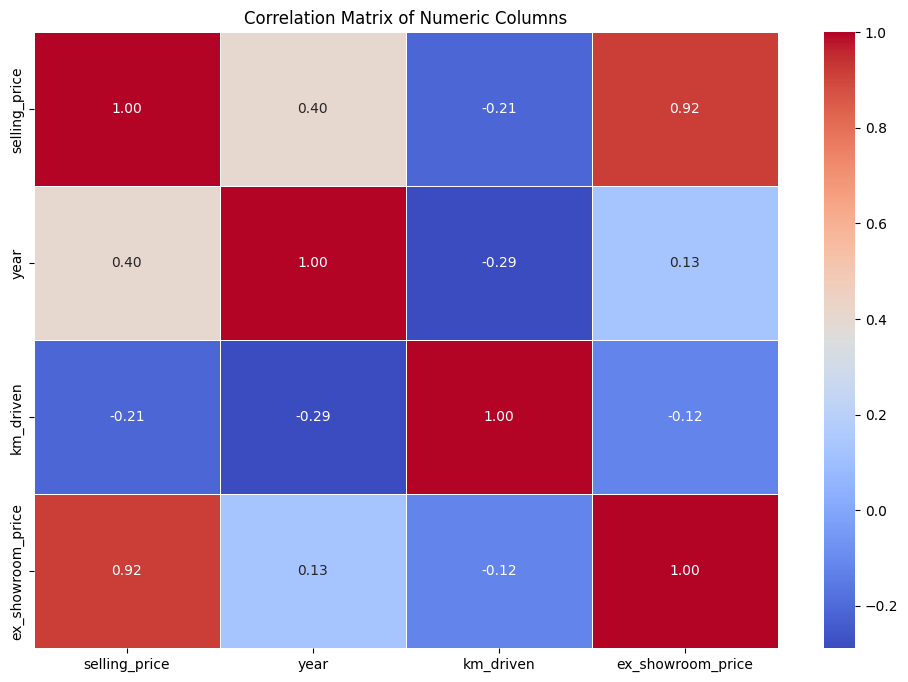

In [ ]:
#Answer 15
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/BIKE DETAILS.csv')

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])  # This line selects only columns with numeric data types

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr() # Now you are calculating the correlation only on numeric columns

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and show the plot
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

EDA 2

Title: Car Sale Dataset

Question 1 - What is the average selling price of cars for each dealer, and how does it compare across different dealers?


         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

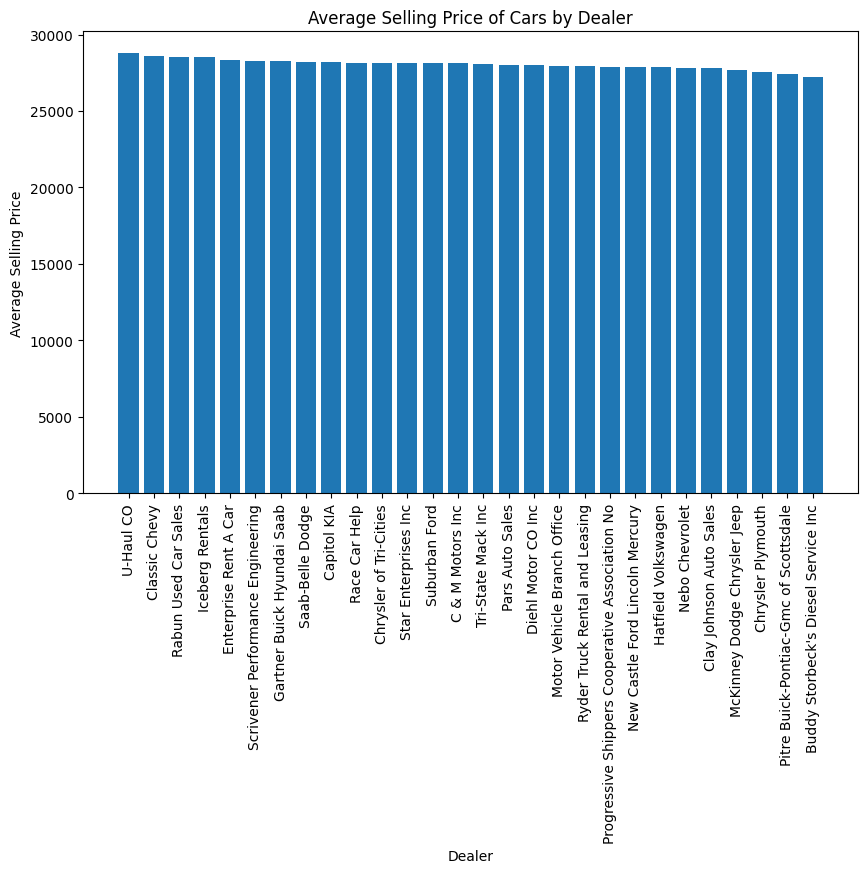

In [ ]:
#Answer 1
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# Calculate the average selling price for each dealer
average_price_by_dealer = data.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# Sort the dealers by average price in descending order
average_price_by_dealer_sorted = average_price_by_dealer.sort_values(by='Price ($)', ascending=False)

# Display the results
print("\nAverage Selling Price by Dealer:")
print(average_price_by_dealer_sorted)

# If you want to visualize the comparison, you can plot the results
import matplotlib.pyplot as plt

# Plot the average selling prices for each dealer
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_dealer_sorted['Dealer_Name'], average_price_by_dealer_sorted['Price ($)'])
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price of Cars by Dealer')
plt.xticks(rotation=90)  # Rotate dealer names if needed for better readability
plt.show()



Question 2 - Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

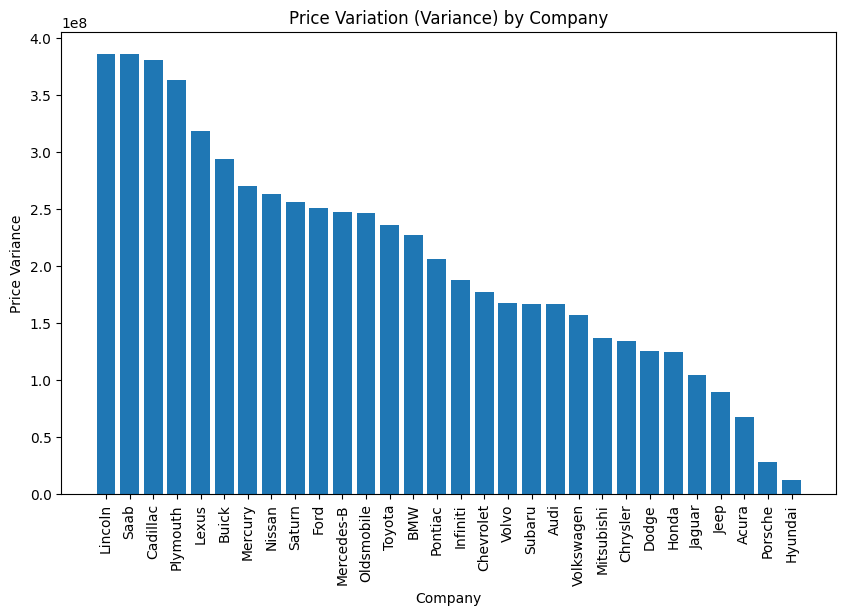

In [ ]:
#Answer 2
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# Calculate the variance of car prices for each brand
variance_by_brand = data.groupby('Company')['Price ($)'].var().reset_index()

# Sort the brands by variance in descending order
variance_by_brand_sorted = variance_by_brand.sort_values(by='Price ($)', ascending=False)

# Display the brand with the highest variance
print("\nCar Brand with the Highest Price Variation:")
print(variance_by_brand_sorted.head(1))

# Optional: Visualization of price variation across brands
import matplotlib.pyplot as plt

# Plot the variance of car prices by brand
plt.figure(figsize=(10, 6))
plt.bar(variance_by_brand_sorted['Company'], variance_by_brand_sorted['Price ($)'])
plt.xlabel('Company')
plt.ylabel('Price Variance')
plt.title('Price Variation (Variance) by Company')
plt.xticks(rotation=90)  # Rotate brand names if needed for better readability
plt.show()



Question 3 - What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

<Figure size 1000x600 with 0 Axes>

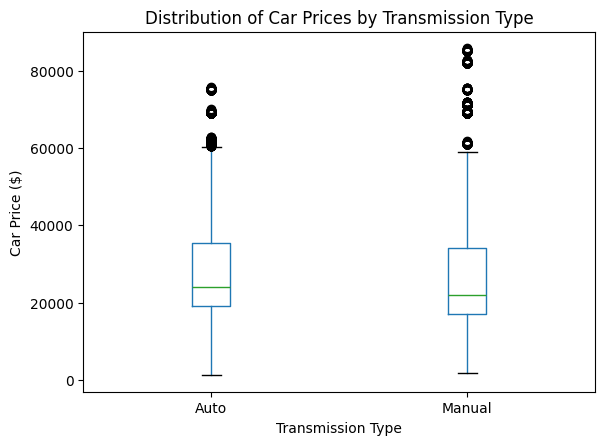

In [ ]:
#Answer 3
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# Calculate the interquartile range (IQR) for each transmission type
# IQR is the difference between the 75th and 25th percentiles
iqr_by_transmission = data.groupby('Transmission')['Price ($)'].quantile(0.75) - data.groupby('Transmission')['Price ($)'].quantile(0.25)

# Print the IQR values for comparison
print("\nInterquartile Range (IQR) by Transmission Type:")
print(iqr_by_transmission)

# Plot the distribution of car prices for each transmission type using boxplot
plt.figure(figsize=(10, 6))
data.boxplot(column='Price ($)', by='Transmission', grid=False)
plt.title('Distribution of Car Prices by Transmission Type')
plt.suptitle('')  # To remove the default subplot title
plt.xlabel('Transmission Type')
plt.ylabel('Car Price ($)')
plt.show()


Question 4 - What is the distribution of car prices across different regions.

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

<Figure size 1000x600 with 0 Axes>

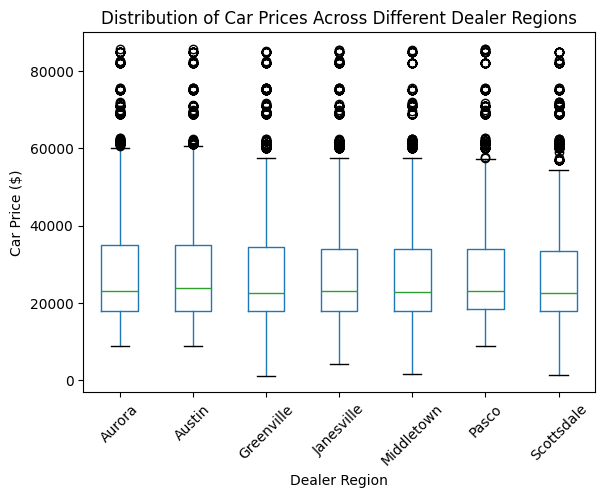


Interquartile Range (IQR) by Dealer Region:
Dealer_Region
Aurora        16999.0
Austin        17000.0
Greenville    16499.0
Janesville    15999.0
Middletown    16000.0
Pasco         15499.5
Scottsdale    15500.0
Name: Price ($), dtype: float64


In [ ]:
#Answer 4
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# Plot the distribution of car prices across different dealer regions using boxplot
plt.figure(figsize=(10, 6))
data.boxplot(column='Price ($)', by='Dealer_Region', grid=False)
plt.title('Distribution of Car Prices Across Different Dealer Regions')
plt.suptitle('')  # To remove the default subplot title
plt.xlabel('Dealer Region')
plt.ylabel('Car Price ($)')
plt.xticks(rotation=45)  # Rotate region names if needed for better readability
plt.show()

# Optional: Calculate and print the IQR for each dealer region (optional)
iqr_by_region = data.groupby('Dealer_Region')['Price ($)'].quantile(0.75) - data.groupby('Dealer_Region')['Price ($)'].quantile(0.25)
print("\nInterquartile Range (IQR) by Dealer Region:")
print(iqr_by_region)


Question 5 -What is the distribution of cars based on body styles?


         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

<Figure size 1000x600 with 0 Axes>

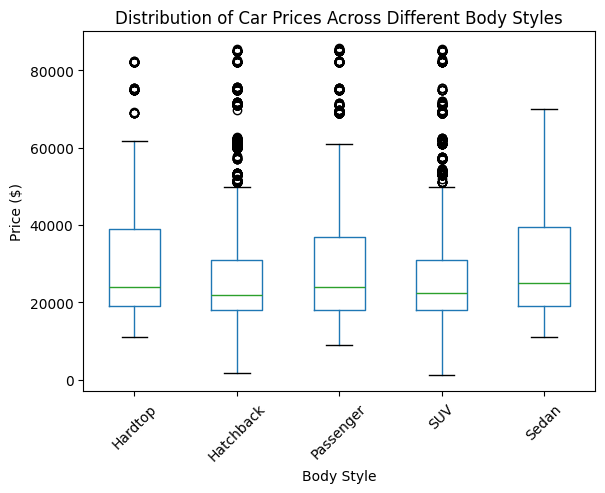

In [ ]:
#Answer 5
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# Plot the distribution of car prices across different body styles using boxplot
plt.figure(figsize=(10, 6))
data.boxplot(column='Price ($)', by='Body Style', grid=False)
plt.title('Distribution of Car Prices Across Different Body Styles')
plt.suptitle('')  # To remove the default subplot title
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)  # Rotate body style names if needed for better readability
plt.show()



Question 6 - How does the average selling price of cars vary by customer gender and annual income?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

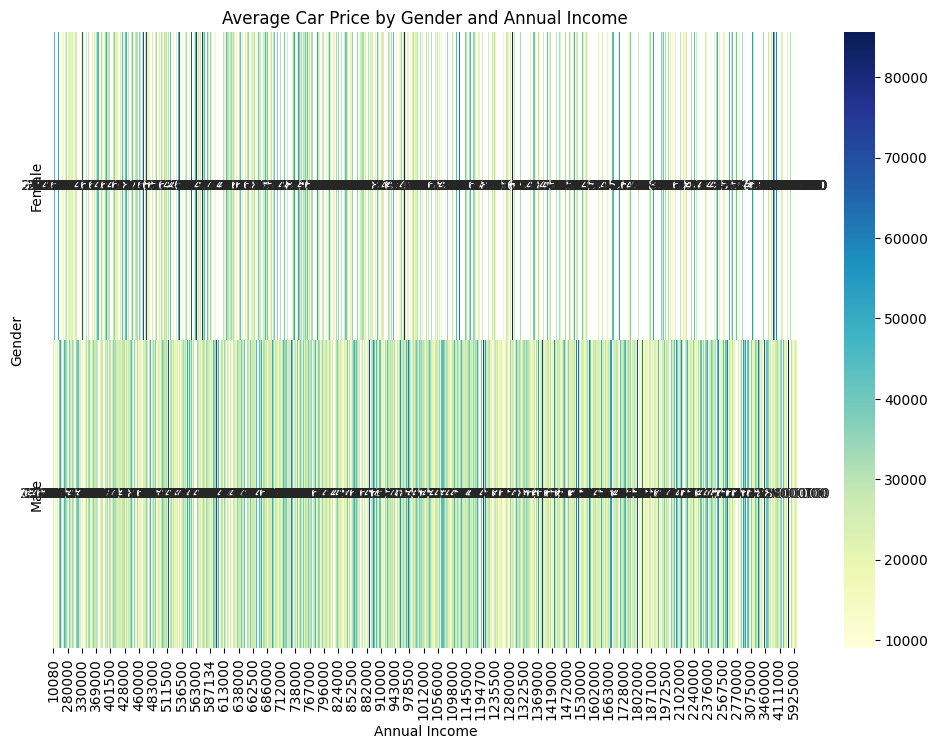

In [ ]:
#Answer 6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# Group the data by gender and annual income, then calculate the average price
avg_price_by_gender_income = data.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()

# Display the average price by gender and annual income
print("\nAverage Price by Gender and Annual Income:")
print(avg_price_by_gender_income)

# Create a pivot table for the heatmap
pivot_data = avg_price_by_gender_income.pivot(index='Gender', columns='Annual Income', values='Price ($)') # Create pivot_data here

# Plot the heatmap to visualize the average price
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Average Car Price by Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Gender') # Added ylabel for clarity
plt.show() # Added show() to display the plot

Question 7 - What is the distribution of car prices by region, and how does the number of cars sold vary by region?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

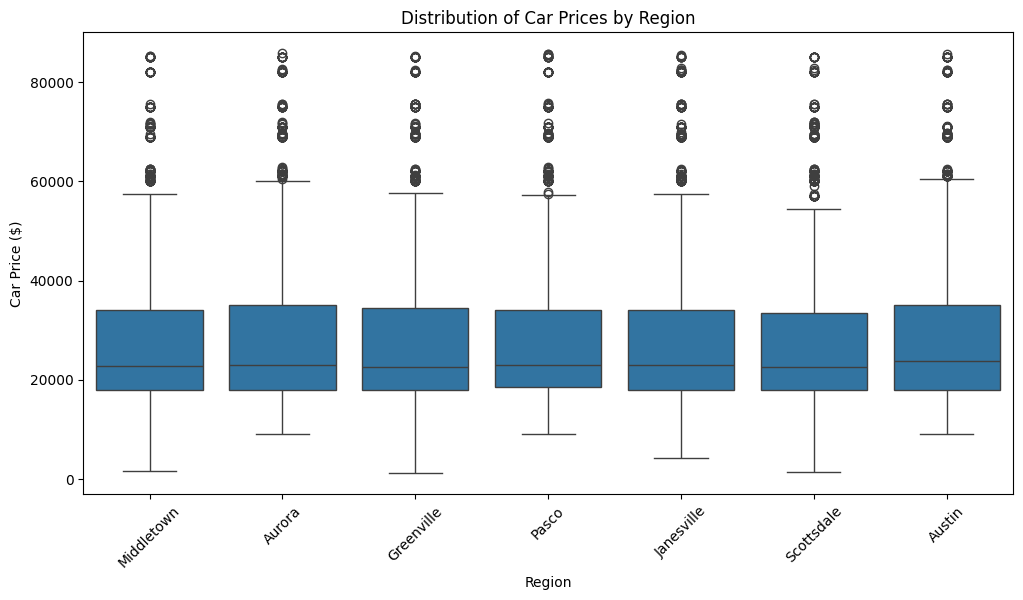

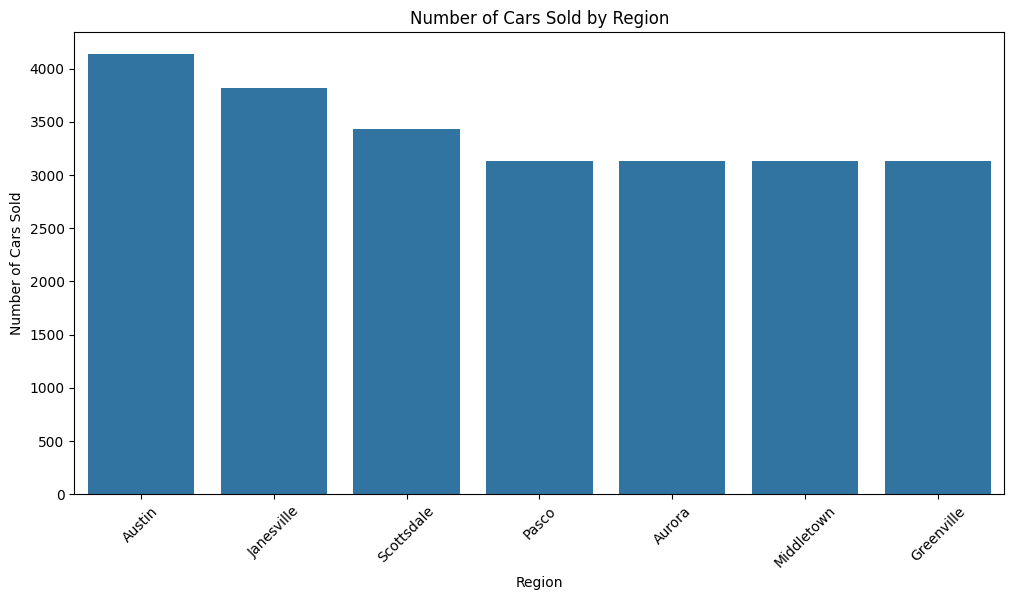

In [ ]:
#Answer 7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# 1. Distribution of Car Prices by Region using Boxplot
plt.figure(figsize=(12, 6))
# Remove the 'grid=False' from the boxplot function call.
sns.boxplot(x='Dealer_Region', y='Price ($)', data=data)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Car Price ($)')
plt.xticks(rotation=45)  # Rotate region names for better readability
# Turn off the grid using Matplotlib's grid function
plt.grid(False)
plt.show()

# 2. Number of Cars Sold by Region using Bar Plot
cars_sold_by_region = data['Dealer_Region'].value_counts()

# Plot the number of cars sold by region
plt.figure(figsize=(12, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)  # Rotate region names for better readability
plt.show()

Question 8 - How does the average car price differ between cars with different engine sizes?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

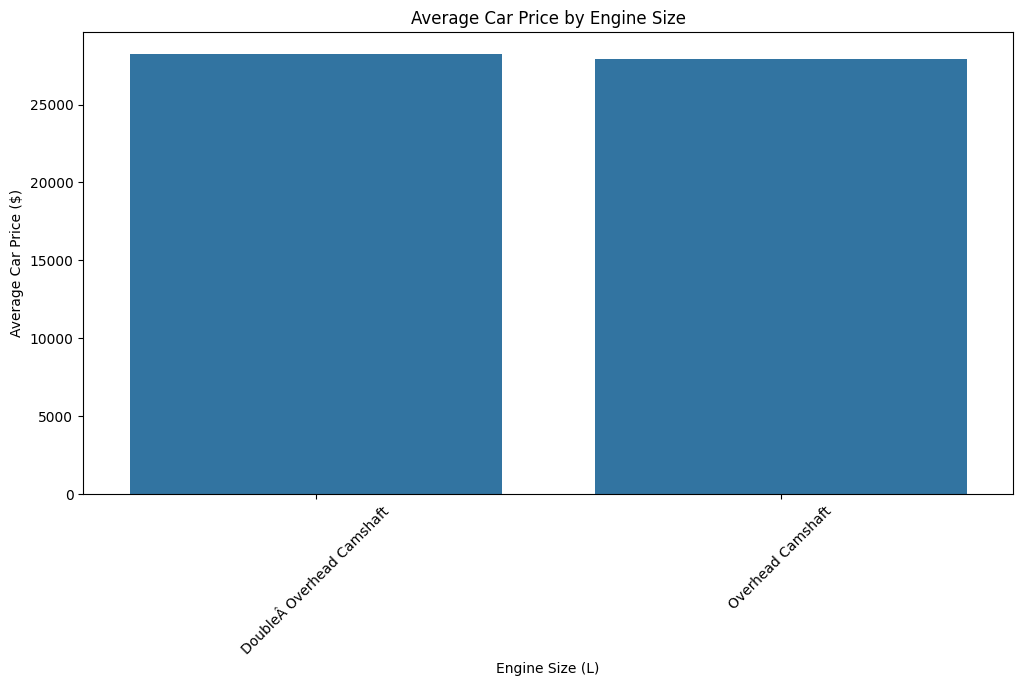

In [ ]:
#Answer 8
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# Group the data by engine and calculate the average price
avg_price_by_engine = data.groupby('Engine')['Price ($)'].mean().reset_index()

# Display the average price by engine
print("\nAverage Price by Engine:")
print(avg_price_by_engine)

# Plot the average price by engine using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Engine', y='Price ($)', data=avg_price_by_engine)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average Car Price ($)')
plt.xticks(rotation=45)  # Rotate engine labels for better readability
plt.show()


Question 9 - How do car prices vary based on the customer’s annual income bracket?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

<ipython-input-73-99591f1989cc>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income_bracket = data.groupby('Income_Bracket')['Price ($)'].mean().reset_index()


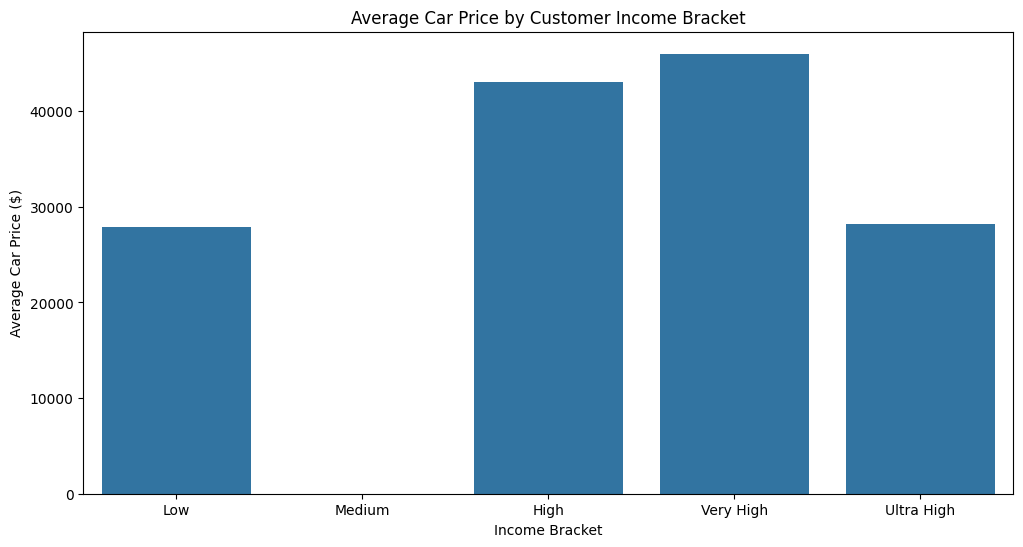

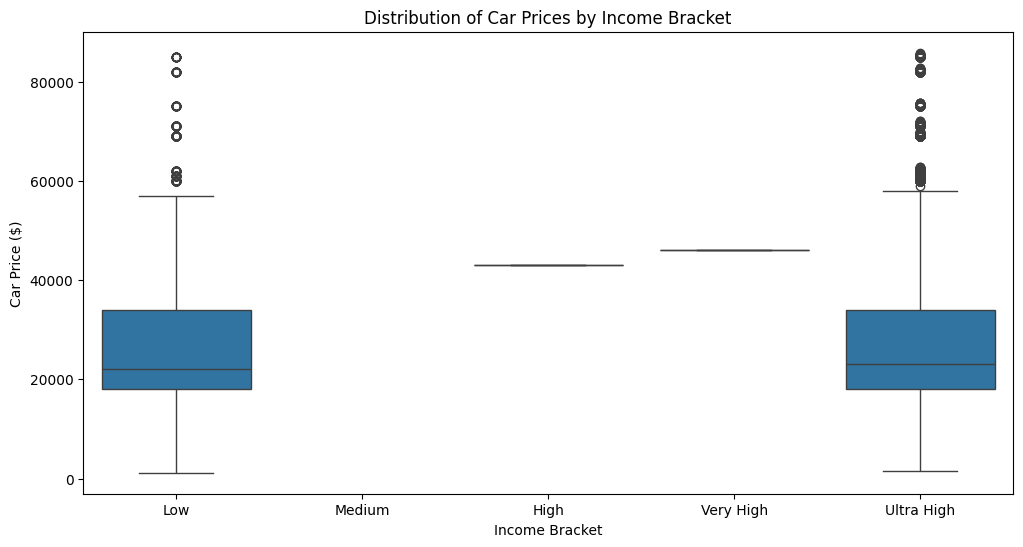

In [ ]:
#Answer 9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# Define income brackets (adjust the values based on your data)
bins = [0, 30000, 60000, 90000, 120000, float('inf')]  # Example income brackets
labels = ['Low', 'Medium', 'High', 'Very High', 'Ultra High']  # Bracket labels
data['Income_Bracket'] = pd.cut(data['Annual Income'], bins=bins, labels=labels)

# Group the data by income bracket and calculate the average price
avg_price_by_income_bracket = data.groupby('Income_Bracket')['Price ($)'].mean().reset_index()

# Display the average price by income bracket
print("\nAverage Price by Income Bracket:")
print(avg_price_by_income_bracket)

# Plot the average price by income bracket using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Income_Bracket', y='Price ($)', data=avg_price_by_income_bracket)
plt.title('Average Car Price by Customer Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.show()

# Optional: Visualize using a boxplot to see distribution of car prices within each bracket
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Bracket', y='Price ($)', data=data)
plt.title('Distribution of Car Prices by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Car Price ($)')
plt.show()


Question 10 - What are the top 5 car models with the highest number of sales, and how does their price distribution look?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

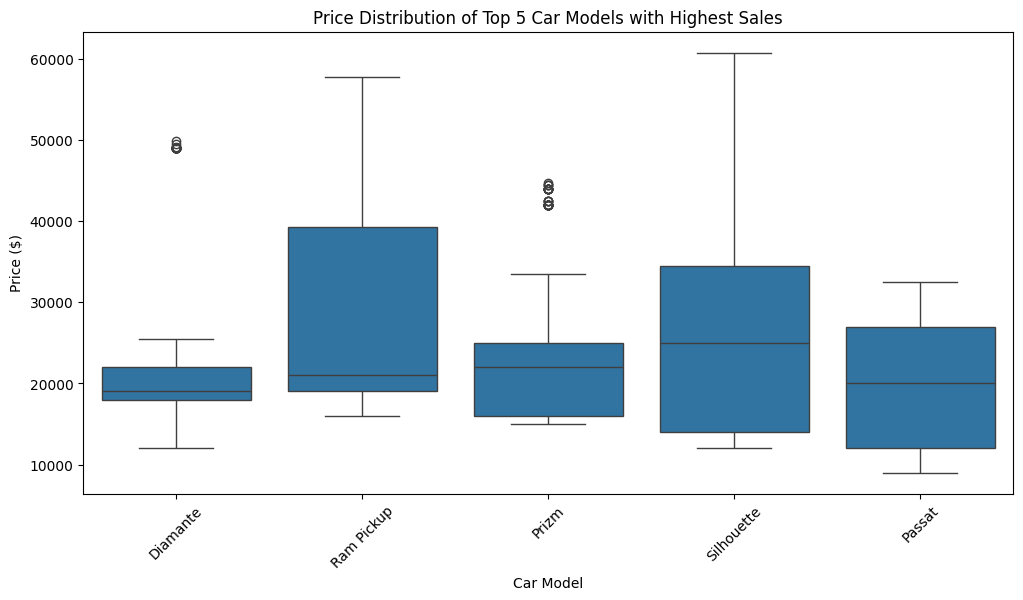

In [ ]:
#Answer 10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# 1. Count the number of sales for each car model
sales_by_model = data['Model'].value_counts()

# 2. Select the top 5 car models with the highest number of sales
top_5_models = sales_by_model.head(5).index

# 3. Filter the dataset to include only the top 5 car models
top_5_data = data[data['Model'].isin(top_5_models)]

# 4. Plot the price distribution of the top 5 car models using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_data)
plt.title('Price Distribution of Top 5 Car Models with Highest Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)  # Rotate car model names for better readability
plt.show()




Question 11 - How does car price vary with engine size across different car colors, and which colors have the highest price variation?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

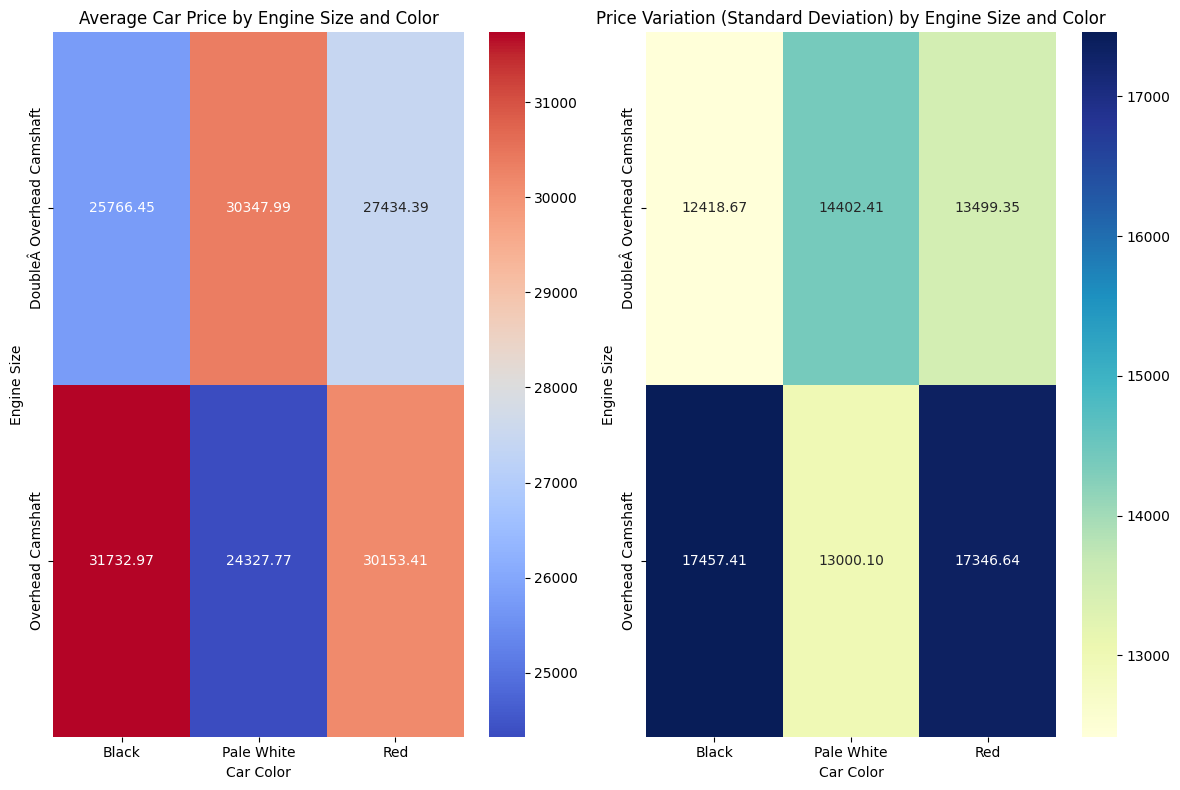


Top Car Colors with the Highest Price Variation:
        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


In [ ]:
#Answer 11
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# 1. Calculate average car price and price variation (standard deviation) by Engine Size and Color
price_variation_by_engine_color = data.groupby(['Engine', 'Color'])['Price ($)'].agg(['mean', 'std']).reset_index()

# 2. Visualize how car price varies with engine size across different car colors
# Use a heatmap for better visual comparison
# Use keyword arguments for index, columns, and values in the pivot function
pivot_price_mean = price_variation_by_engine_color.pivot(index='Engine', columns='Color', values='mean')
pivot_price_std = price_variation_by_engine_color.pivot(index='Engine', columns='Color', values='std')

plt.figure(figsize=(12, 8))

# Heatmap for Mean Price
plt.subplot(1, 2, 1)
sns.heatmap(pivot_price_mean, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Car Price by Engine Size and Color')
plt.xlabel('Car Color')
plt.ylabel('Engine Size')

# Heatmap for Price Variation (Standard Deviation)
plt.subplot(1, 2, 2)
sns.heatmap(pivot_price_std, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Price Variation (Standard Deviation) by Engine Size and Color')
plt.xlabel('Car Color')
plt.ylabel('Engine Size')

plt.tight_layout()
plt.show()

# 3. Identify the colors with the highest price variation
# Calculate price variation by color
price_variation_by_color = data.groupby('Color')['Price ($)'].std().reset_index()

# Sort by price variation (standard deviation)
price_variation_by_color_sorted = price_variation_by_color.sort_values('Price ($)', ascending=False)

# Display the top colors with the highest price variation
print("\nTop Car Colors with the Highest Price Variation:")
print(price_variation_by_color_sorted.head())

Question 12 - Is there any seasonal trend in car sales based on the date of sale?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

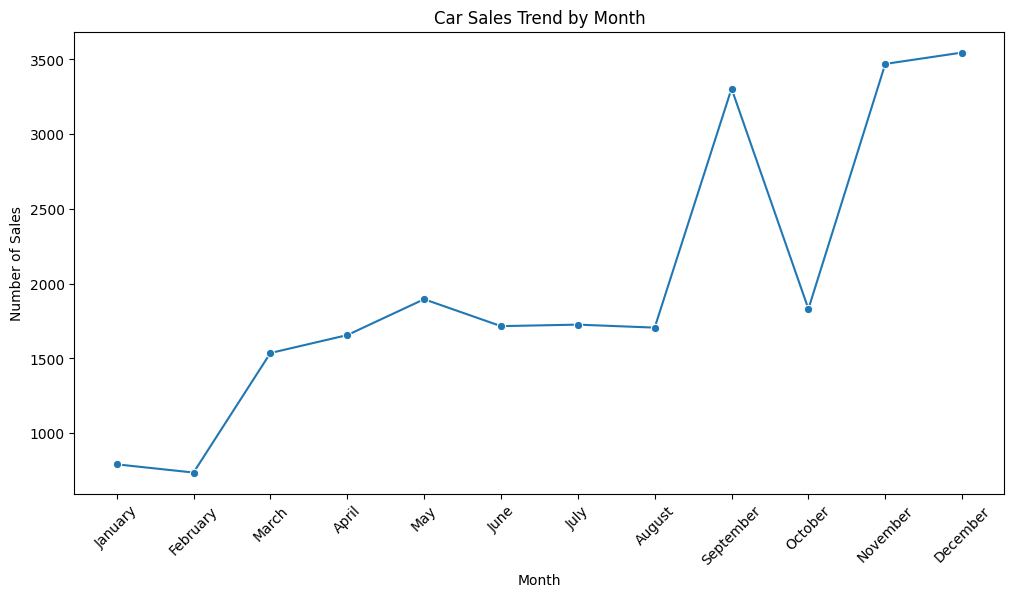

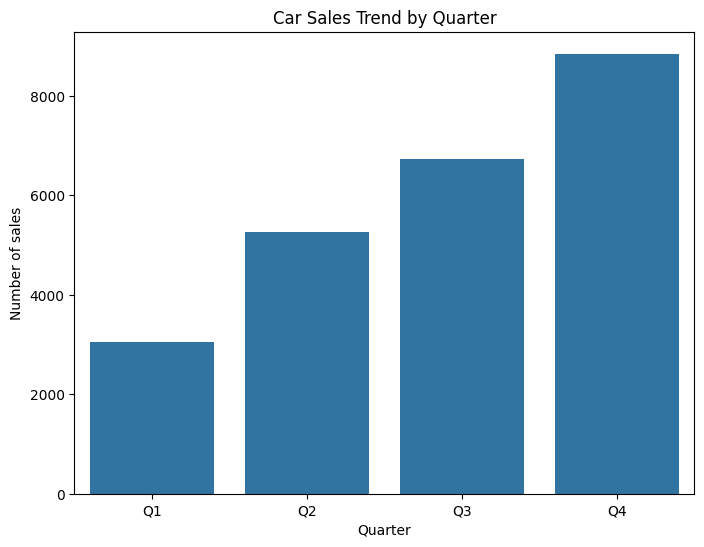

In [ ]:
#Answer 12
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# 1. Convert the 'Date' column to datetime format if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# 2. Extract month and year from the 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Month_Name'] = data['Date'].dt.strftime('%B')  # Full month name
data['Quarter'] = data['Date'].dt.quarter
data['Day_of_Week'] = data['Date'].dt.day_name()

# 3. Aggregate sales by month to identify seasonal trends
sales_by_month = data.groupby('Month')['Price ($)'].count().reset_index()  # Count the number of sales
sales_by_month['Month_Name'] = sales_by_month['Month'].apply(lambda x: pd.to_datetime(f'2022-{x}-01').strftime('%B'))

# 4. Plot the sales trend by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Name', y='Price ($)', data=sales_by_month, marker='o')
plt.title('Car Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)  # Rotate month names for better readability
plt.show()

# 5. Optional: Aggregate sales by quarter to see broader seasonal trends
sales_by_quarter = data.groupby('Quarter')['Price ($)'].count().reset_index()
sales_by_quarter['Quarter'] = sales_by_quarter['Quarter'].apply(lambda x: f'Q{x}')

# Plot the sales trend by quarter
plt.figure(figsize=(8, 6))
sns.barplot(x='Quarter', y='Price ($)', data=sales_by_quarter)
plt.title('Car Sales Trend by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of sales')
plt.show()


Question 13 - How does the car price distribution change when considering different combinations of body style and transmission type?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

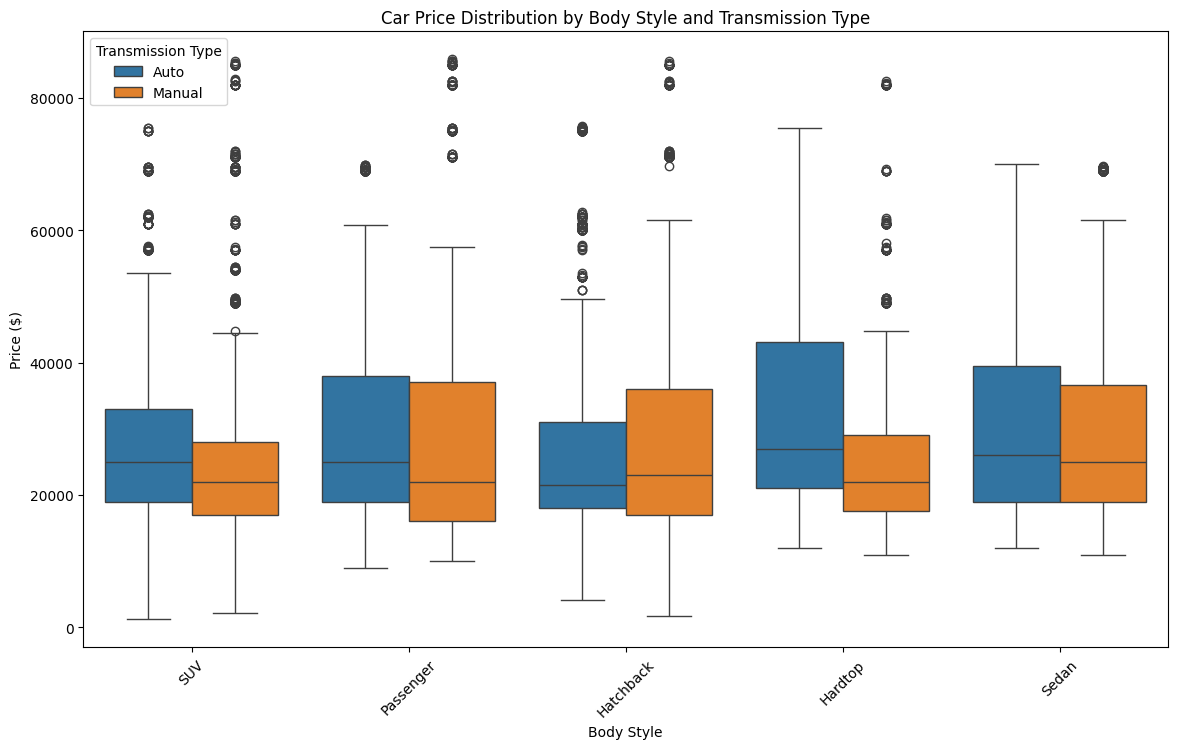

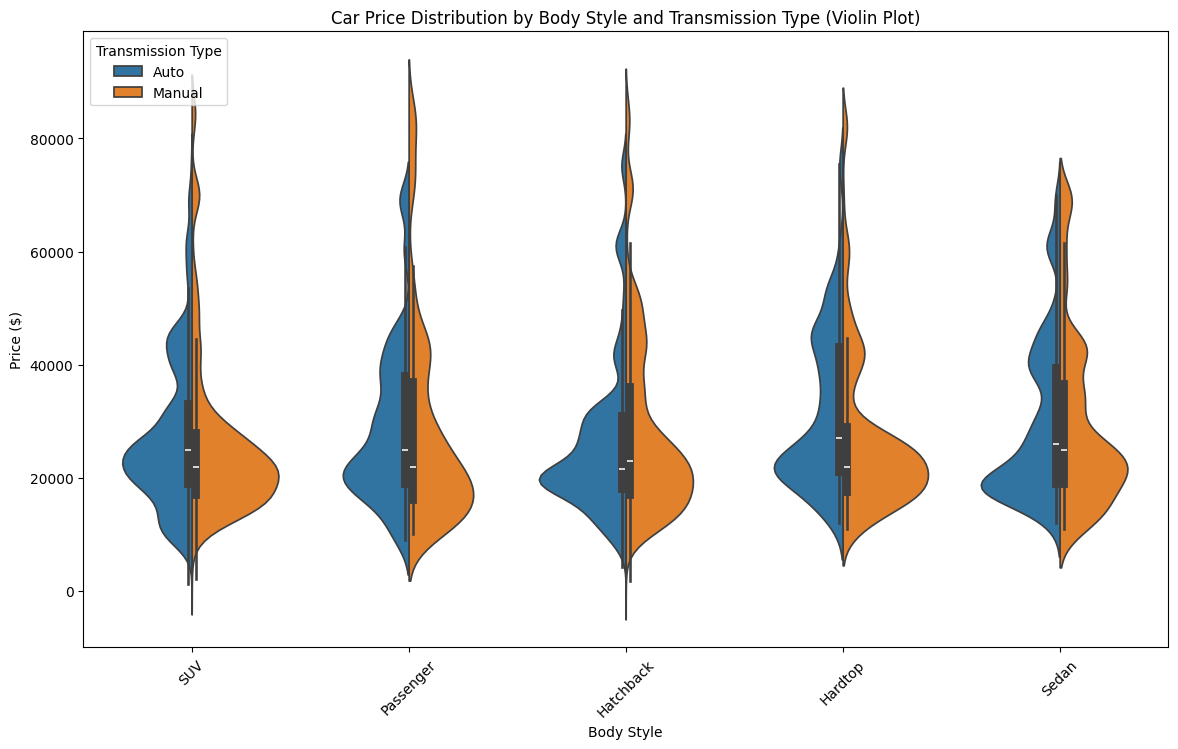

In [ ]:
#Answer 13
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# 1. Plot the price distribution for different combinations of body style and transmission type
plt.figure(figsize=(14, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=data)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)  # Rotate body style names for better readability
plt.legend(title='Transmission Type', loc='upper left')
plt.show()

# Optional: If you prefer a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Body Style', y='Price ($)', hue='Transmission', data=data, split=True)
plt.title('Car Price Distribution by Body Style and Transmission Type (Violin Plot)')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)  # Rotate body style names for better readability
plt.legend(title='Transmission Type', loc='upper left')
plt.show()


Question 14 - What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

<ipython-input-80-89c2eb44d4b8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['Engine'] = pd.to_numeric(numeric_data['Engine'].str.extract('(\d+\.?\d*)', expand=False), errors='coerce')


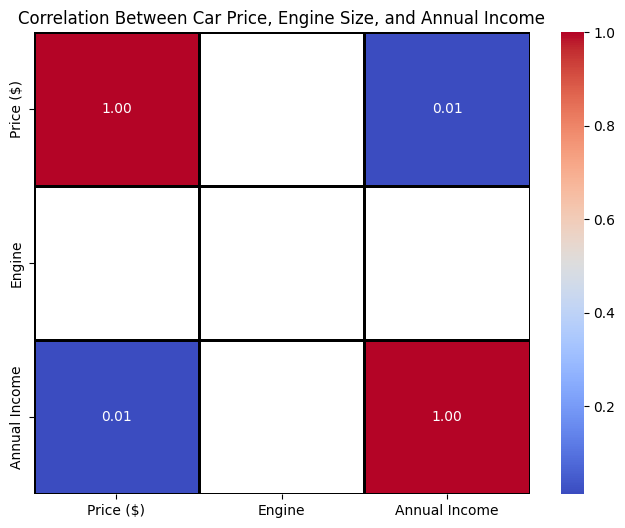

In [ ]:
#Answer 14
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# 1. Calculate the correlation matrix for car price, engine size, and annual income
# Select only numeric columns for correlation calculation
numeric_columns = ['Price ($)', 'Engine', 'Annual Income']
numeric_data = data[numeric_columns]

# Convert 'Engine' column to numeric if needed
# Assuming 'Engine' contains strings like "1.5L", "2.0L", etc.
# Extract the numeric part and convert to float
numeric_data['Engine'] = pd.to_numeric(numeric_data['Engine'].str.extract('(\d+\.?\d*)', expand=False), errors='coerce')

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# 2. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Between Car Price, Engine Size, and Annual Income')
plt.show()

# ... (Rest of your code for scatter plots and pair plot)

Question 15 - How does the average car price vary across different car models and engine types?

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

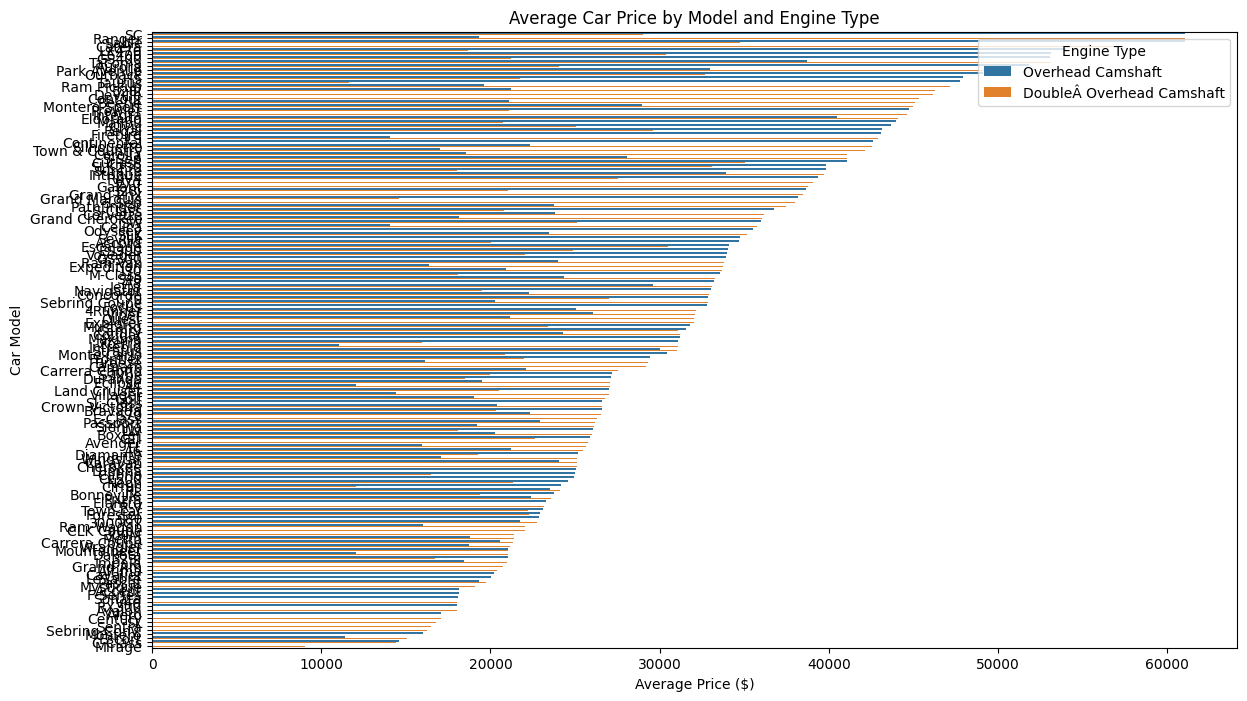

In [ ]:
#Answer 15
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/Car Sale.csv')

# Check the first few rows to understand the data structure
print(data.head())

# 1. Group by car model and engine type and calculate the average price
avg_price_by_model_engine = data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# 2. Sort the data by price for better visualization
avg_price_by_model_engine_sorted = avg_price_by_model_engine.sort_values(by='Price ($)', ascending=False)

# 3. Plot the average car prices by model and engine type
plt.figure(figsize=(14, 8))
sns.barplot(x='Price ($)', y='Model', hue='Engine', data=avg_price_by_model_engine_sorted)
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Average Price ($)')
plt.ylabel('Car Model')
plt.legend(title='Engine Type', loc='upper right')
plt.show()


EDA 3

Title: Amazon Sales Data

Queastion 1 - What is the average rating for each product category?


In [ ]:
#Answer 1
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/amazon.csv')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the average rating for each product category
average_ratings = df.groupby('category')['rating'].mean().reset_index()

# Display the result
print(average_ratings)


                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


Question 2 - What are the top rating_count products by category?

In [ ]:
#Answer 2
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/amazon.csv')


# Sort the products within each category by 'rating_count' in descending order
top_products_by_category = df.sort_values(['category', 'rating_count'], ascending=[True, False])

# Group by 'category' and get the top product (first row) per category
top_products = top_products_by_category.groupby('category').first().reset_index()

# Display the result
print(top_products[['category', 'product_name', 'rating_count']])


                                              category  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...   
1    Computers&Accessories|Accessories&Peripherals|...   
2    Computers&Accessories|Accessories&Peripherals|...   
3    Computers&Accessories|Accessories&Peripherals|...   
4    Computers&Accessories|Accessories&Peripherals|...   
..                                                 ...   
206  OfficeProducts|OfficePaperProducts|Paper|Stati...   
207  OfficeProducts|OfficePaperProducts|Paper|Stati...   
208  OfficeProducts|OfficePaperProducts|Paper|Stati...   
209  OfficeProducts|OfficePaperProducts|Paper|Stati...   
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                          product_name rating_count  
0    Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
1    rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
2    Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222  
3    HUMBLE Dynamic Lap

Question 3 - What is the distribution of discounted prices vs. actual prices?

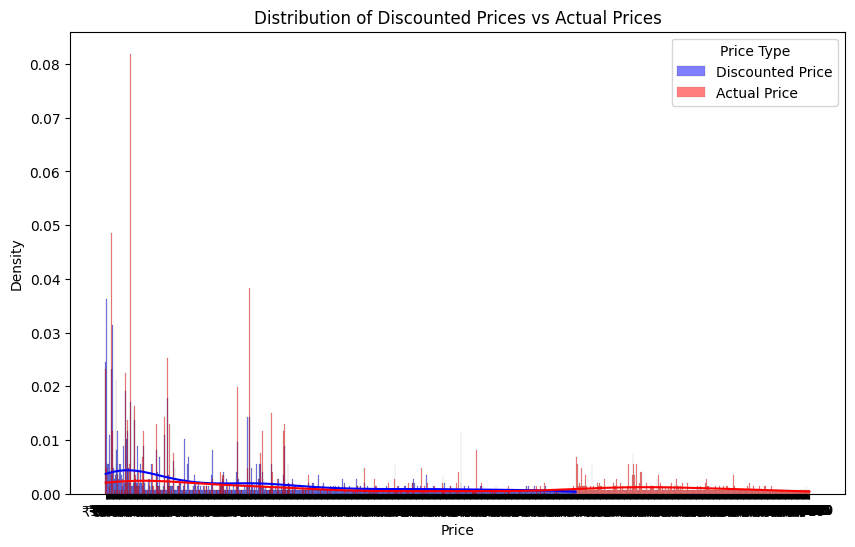

In [ ]:
#Answer 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/amazon.csv')


# Create a plot for the distribution of discounted prices vs actual prices
plt.figure(figsize=(10, 6))

# Plotting the distribution of 'discounted_price'
sns.histplot(df['discounted_price'], kde=True, color='blue', label='Discounted Price', stat='density', bins=20)

# Plotting the distribution of 'actual_price'
sns.histplot(df['actual_price'], kde=True, color='red', label='Actual Price', stat='density', bins=20)

# Add labels and a title
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Price Type')

# Show the plot
plt.show()


Question 4 - How does the average discount percentage vary across categories?


In [ ]:
#Answer 4
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/amazon.csv')

# Convert 'discount_percentage' to numeric by removing '%' and dividing by 100
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype('float') / 100

# Calculate the average discount percentage for each category
average_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

# Display the result
print(average_discount_by_category)

                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                0.420
1    Computers&Accessories|Accessories&Peripherals|...                0.785
2    Computers&Accessories|Accessories&Peripherals|...                0.350
3    Computers&Accessories|Accessories&Peripherals|...                0.565
4    Computers&Accessories|Accessories&Peripherals|...                0.465
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.050
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.175
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                0.130
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                0.000

[211 rows x 2 columns]


Question 5 - What are the most popular product names?

In [ ]:
#Answer 5
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/amazon.csv')


# Sort the products by 'rating_count' in descending order to find the most popular ones
most_popular_products = df.sort_values(by='rating_count', ascending=False)

# Display the most popular products based on 'rating_count'
popular_products = most_popular_products[['product_name', 'rating_count']].head(10)

# Display the result
print(popular_products)


                                           product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...           97


Question 6 - What are the most popular product keywords?

In [ ]:
#Answer 6
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import nltk

# Download NLTK stopwords (only once)
nltk.download('stopwords')
nltk.download('punkt')
# Download the missing data package using NLTK Downloader
nltk.download('punkt_tab')


# Load the dataset
df = pd.read_csv('/content/amazon.csv')

df['product_name'] = df['product_name'].astype(str)
df['about_product'] = df['about_product'].astype(str)

text_data = df['product_name'] + ' ' + df['about_product']



# Define a function to clean and tokenize text
def clean_and_tokenize(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply the cleaning and tokenization function to all text data
all_tokens = text_data.apply(clean_and_tokenize)

# Flatten the list of tokens
flat_tokens = [token for sublist in all_tokens for token in sublist]

# Count the frequency of each keyword
keyword_counts = Counter(flat_tokens)

# Get the most common 10 keywords
most_common_keywords = keyword_counts.most_common(10)

# Display the result
print("Most Popular Keywords:")
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Most Popular Keywords:
usb: 1396
cable: 1234
charging: 852
1: 783
fast: 574
warranty: 568
type: 561
power: 550
black: 550
c: 542


Question 7 - What are the most popular product reviews?

In [ ]:
#Answer 7
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/amazon.csv')

# Ensure relevant columns are in the correct format (if they exist)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')  # Ensure 'rating_count' is numeric
df['review_title'] = df['review_title'].astype(str)
df['review_content'] = df['review_content'].astype(str)
df['product_name'] = df['product_name'].astype(str)

# Remove rows with NaN values in 'rating_count', 'review_title' or 'review_content'
df = df.dropna(subset=['rating_count', 'review_title', 'review_content'])

# Sort the reviews by 'rating_count' to find the most popular reviews
sorted_reviews = df.sort_values(by='rating_count', ascending=False)

# Display the top 10 most popular reviews
top_reviews = sorted_reviews[['product_name', 'review_title', 'review_content', 'rating_count']].head(10)

# Display the result
print("Top Most Popular Reviews:")
print(top_reviews)


Top Most Popular Reviews:
                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...   
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...   
214   Crypo™ Universal Remote Compatible with Tata S...   
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
1059  Kettle is good but bottle is not good quality,...   
151   Great Cable, Charging Speeds Could Be Better,G...   
32    Great Cable, Charging S

Question 8 - What is the correlation between discounted_price and rating?

In [49]:
#Answer 8
import pandas as pd

# Load the uploaded CSV file to examine its contents and structure
file_path = '/content/amazon.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column information to understand the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

(   product_id                                       product_name  \
 0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
 1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
 2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
 3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
 4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
 
                                             category discounted_price  \
 0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
 1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
 2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
 3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
 4  Computers&Accessories|Accessories&Peripherals|...             ₹154   
 
   actual_price discount_percentage rating rating_count  \
 0       ₹1,099                 64%    4.2       24,269   
 1         ₹349     

In [50]:
# Clean and convert 'discounted_price' and 'rating' to numeric values
data['discounted_price'] = data['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')  # Convert to numeric, setting invalid values to NaN

# Drop rows with missing or invalid data in these columns
clean_data = data.dropna(subset=['discounted_price', 'rating'])

# Calculate the correlation between 'discounted_price' and 'rating'
correlation = clean_data['discounted_price'].corr(clean_data['rating'])
correlation


0.12033741712288548

Question 9 - What are the Top 5 categories based on the highest ratings?

In [33]:
#Answer 9
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/amazon.csv')

# Ensure that 'rating' is numeric and convert invalid values to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows where 'rating' or 'category' is NaN
df_cleaned = df.dropna(subset=['rating', 'category'])

# Group by 'category' and calculate the mean rating for each category
category_ratings = df_cleaned.groupby('category')['rating'].mean()

# Sort the categories by average rating in descending order and get the top 5
top_5_categories = category_ratings.sort_values(ascending=False).head(5)

# Display the top 5 categories and their average ratings
print("Top 5 categories based on highest average ratings:")
print(top_5_categories)


Top 5 categories based on highest average ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


Question 10 - Identify any potential areas for improvement or optimization based on the data analysis.

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   obj

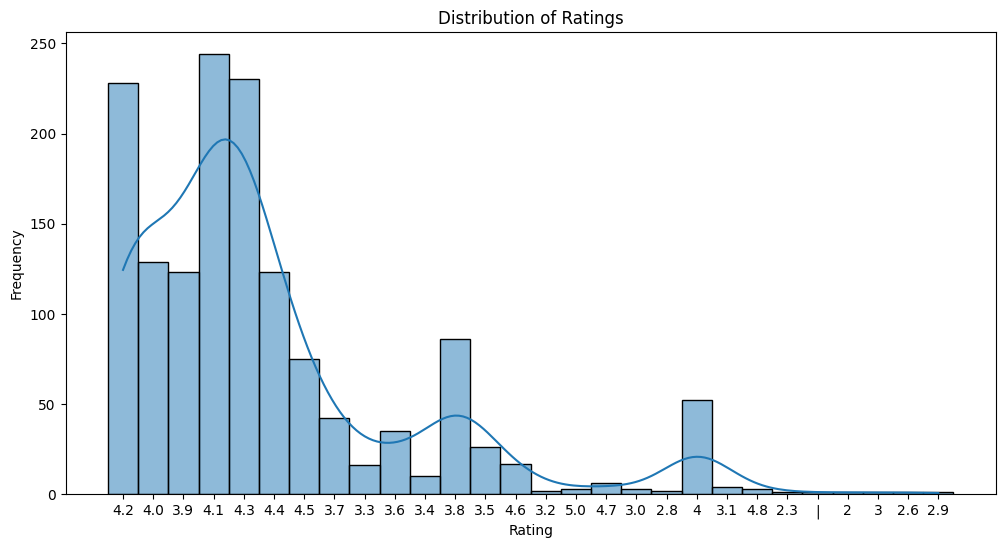

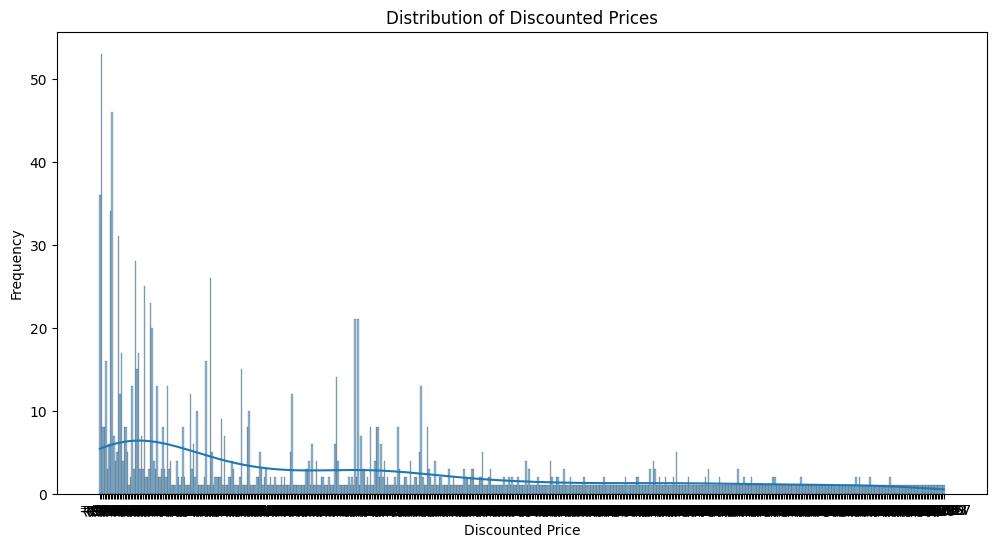

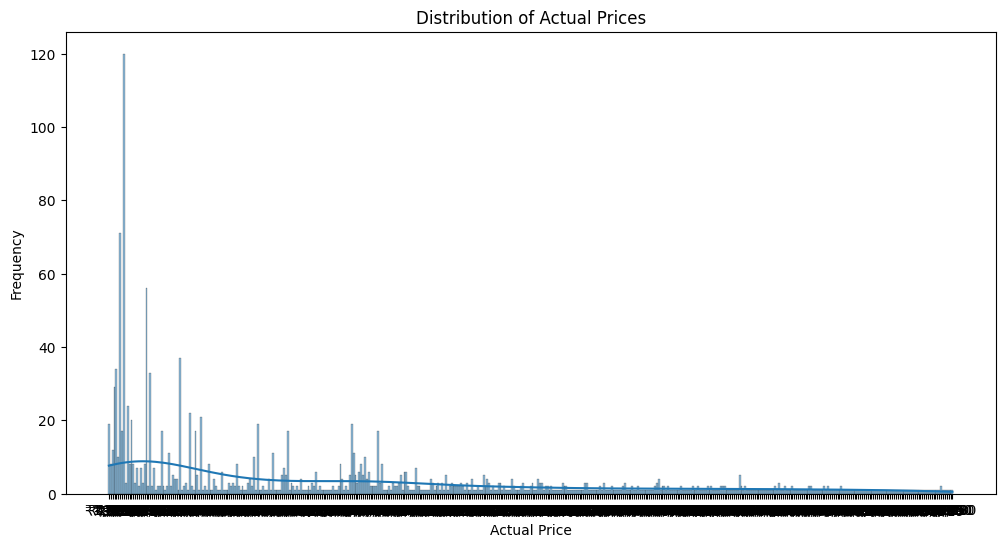

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/amazon.csv')

# Data Overview
print("Data Overview:")
print(df.info())

# Check for missing or null values
missing_data = df.isnull().sum()
print("\nMissing Data Count:")
print(missing_data[missing_data > 0])

# Drop rows with missing critical data (e.g., 'rating', 'category', etc.)
df_cleaned = df.dropna(subset=['rating', 'category', 'discounted_price', 'actual_price'])

# 1. Distribution of Numeric Data (Check for Skewness and Outliers)
# Checking the distribution of ratings, discounted prices, and actual prices
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['rating'], kde=True, bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['discounted_price'], kde=True, bins=10)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['actual_price'], kde=True, bins=10)
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()




Based on the data analysis and the dataset's structure,here are some areas for improvement or optimization:

1. Data Cleaning and Consistency
Column Formatting:
Ensure numerical columns (e.g., discounted_price, actual_price, rating) are stored as numerical types.
Convert discount_percentage to a numerical format for better analysis.
Handling Missing Values:
Columns like rating_count have missing or invalid entries. Evaluate if these rows should be imputed, filled, or removed.
2. Data Enrichment
Feature Engineering:
Derive new columns like price_difference (difference between actual_price and discounted_price) and discount_ratio to analyze pricing strategies more effectively.
Rating Analysis:
Investigate if outlier ratings (e.g., 1-star or 5-star products) correlate with price or category.
3. Category-Wise Analysis
Break down insights by category to see if the weak correlation between price and ratings varies across product types. Some categories might show stronger trends.
4. Customer Engagement
Text Analysis:
Perform sentiment analysis on review_title and review_content to assess customer satisfaction.
Compare sentiment scores with ratings for validation.
User Behavior:
Analyze rating_count to understand how engagement levels affect ratings.
5. Visualization
Plot scatterplots, heatmaps, or box plots:
Compare rating and discounted_price across different categories.
Visualize trends like the distribution of ratings or prices.
6. Optimizing Product Offerings
Explore whether high discounts correlate with higher ratings for specific products or categories.
Assess if products with high rating_count consistently maintain good ratings, which could highlight popular and reliable products.

EDA 4

Title:  Spotify Data:Popular Hip-Hop Artists and Tracks

Question 1 - Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [51]:
#Answer 1
# Load the new CSV file
spotify_file_path = '/content/spotify.csv'
spotify_data = pd.read_csv(spotify_file_path)

# Display the first few rows and check for null values and duplicates
spotify_head = spotify_data.head()
spotify_info = spotify_data.info()
spotify_nulls = spotify_data.isnull().sum()
spotify_duplicates = spotify_data.duplicated().sum()

spotify_head, spotify_info, spotify_nulls, spotify_duplicates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


(  Artist                               Track Name  Popularity  Duration (ms)  \
 0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
 1  Drake                                One Dance          91         173986   
 2  Drake                       IDGAF (feat. Yeat)          90         260111   
 3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
 4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   
 
                  Track ID  
 0  1yeB8MUNeLo9Ek1UEpsyz6  
 1  1zi7xx7UVEFkmKfv06H8x0  
 2  2YSzYUF3jWqb9YP9VXmpjE  
 3  7aqfrAY2p9BUSiupwk3svU  
 4  3F5CgOj3wFlRv51JsHbxhe  ,
 None,
 Artist           0
 Track Name       0
 Popularity       0
 Duration (ms)    0
 Track ID         0
 dtype: int64,
 27)

In [52]:
# Remove duplicate rows
spotify_data_cleaned = spotify_data.drop_duplicates()

# Verify that duplicates have been removed
duplicates_after_cleaning = spotify_data_cleaned.duplicated().sum()
rows_before = len(spotify_data)
rows_after = len(spotify_data_cleaned)

rows_before, rows_after, duplicates_after_cleaning


(440, 413, 0)

Question 2 - What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

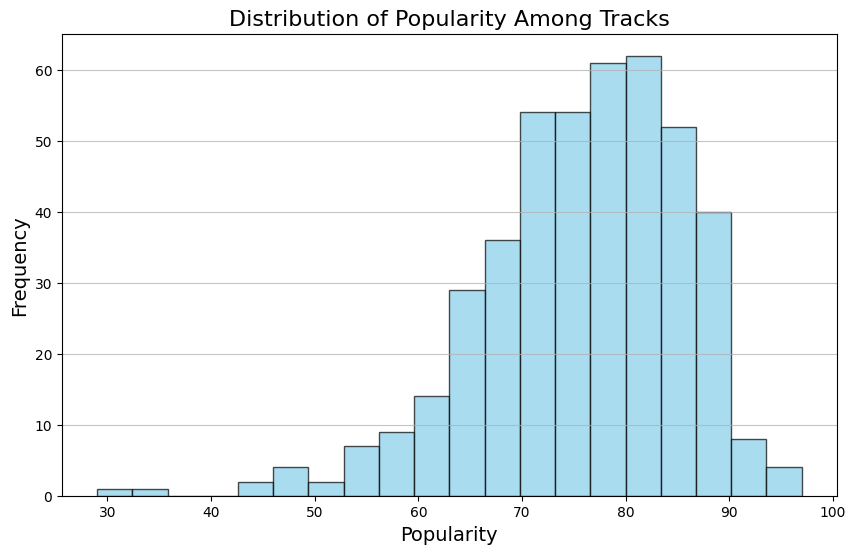

In [53]:
import matplotlib.pyplot as plt

# Plot a histogram to visualize the distribution of 'Popularity'
plt.figure(figsize=(10, 6))
plt.hist(spotify_data['Popularity'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Popularity Among Tracks', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


Question 3 - Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

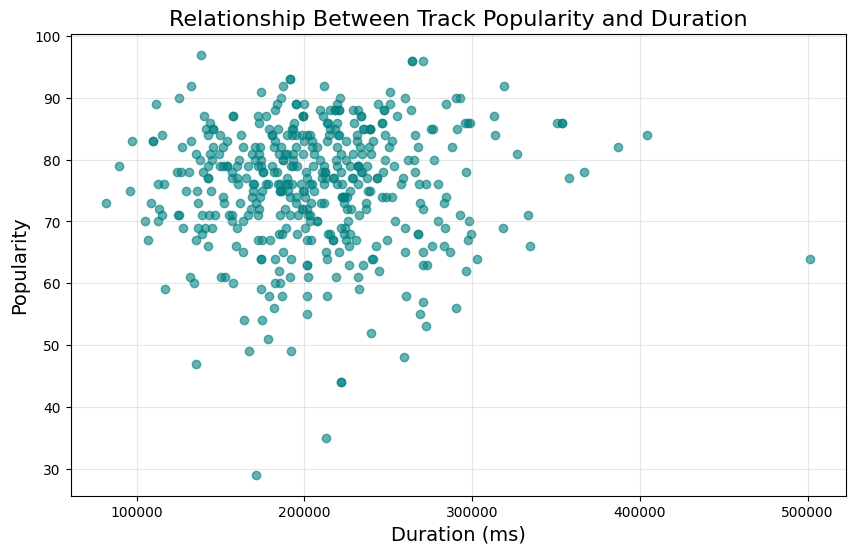

In [54]:
#Answer 3
# Create a scatter plot to explore the relationship between 'Popularity' and 'Duration (ms)'
plt.figure(figsize=(10, 6))
plt.scatter(spotify_data['Duration (ms)'], spotify_data['Popularity'], alpha=0.6, color='teal')
plt.title('Relationship Between Track Popularity and Duration', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


Question 4 - Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

<ipython-input-55-65a14a863547>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis', edgecolor='black', alpha=0.8)


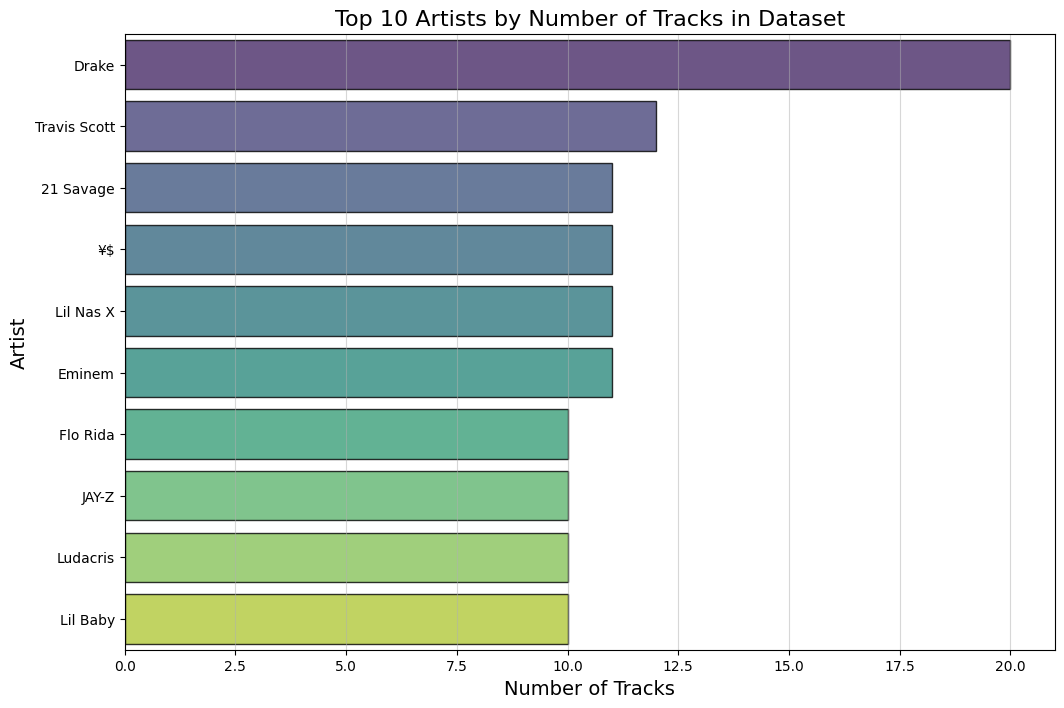

In [55]:
#Answer 4
import seaborn as sns

# Count the number of tracks per artist
artist_track_counts = spotify_data['Artist'].value_counts()

# Plot a countplot for the top 10 artists with the most tracks
plt.figure(figsize=(12, 8))
top_artists = artist_track_counts.head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis', edgecolor='black', alpha=0.8)
plt.title('Top 10 Artists by Number of Tracks in Dataset', fontsize=16)
plt.xlabel('Number of Tracks', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.grid(axis='x', alpha=0.5)
plt.show()


Question 5 - What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [56]:
#Answer 5
# Sort the dataset by 'Popularity' in ascending order to find the least popular tracks
least_popular_tracks = spotify_data.sort_values(by='Popularity', ascending=True).head(5)

# Select only the relevant columns: 'Artist' and 'Track Name'
least_popular_tracks_info = least_popular_tracks[['Artist', 'Track Name']]

least_popular_tracks_info



,Artist,Track Name
207,Pressa,Attachments (feat. Coi Leray)
231,Justin Bieber,Intentions
435,French Montana,Splash Brothers
413,French Montana,Splash Brothers
225,Lil Baby,On Me - Remix


Question 6 - Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [57]:
#Answer 6
# Calculate the average popularity for each artist
artist_popularity_avg = spotify_data.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Get the top 5 most popular artists by average popularity
top_5_artists_avg_popularity = artist_popularity_avg.head(5)

top_5_artists_avg_popularity


,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,87.000000
¥$,86.090909


Question 7 - For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [59]:
#Answer 7
# Identify the top 5 most popular artists based on the number of tracks
top_5_artists = spotify_data['Artist'].value_counts().head(5).index

# Filter the dataset to include only tracks by the top 5 artists
top_5_artists_data = spotify_data[spotify_data['Artist'].isin(top_5_artists)]

# Find the most popular track for each of the top 5 artists
most_popular_tracks = top_5_artists_data.loc[top_5_artists_data.groupby('Artist')['Popularity'].idxmax()]

# Select only the relevant columns: 'Artist' and 'Track Name'
most_popular_tracks_info = most_popular_tracks[['Artist', 'Track Name']]

most_popular_tracks_info


,Artist,Track Name
70,21 Savage,redrum
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA)
312,Lil Nas X,THATS WHAT I WANT
30,Travis Scott,FE!N (feat. Playboi Carti)
260,¥$,CARNIVAL


Question 8 - Visualize relationships between multiple numerical variables simultaneously using a pair plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


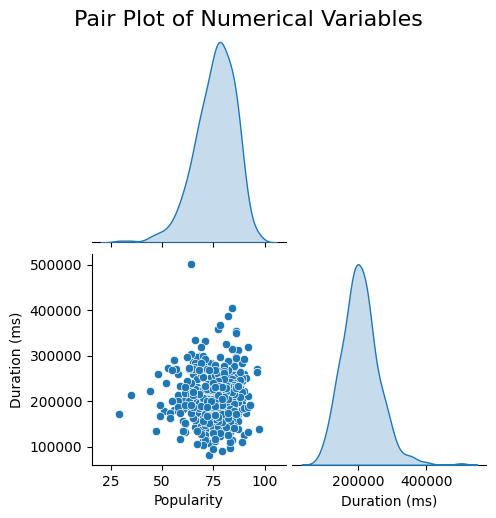

In [60]:
#Answer 8
# Create a pair plot to visualize relationships between numerical variables
import seaborn as sns

# Select numerical columns for the pair plot
numerical_columns = ['Popularity', 'Duration (ms)']

# Create the pair plot
sns.pairplot(spotify_data[numerical_columns], diag_kind='kde', corner=True, palette='coolwarm')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)
plt.show()


Question 9 - Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

In [61]:
#Answer 9
import pandas as pd

# Load the uploaded file to examine its contents
file_path = '/content/spotify.csv'
spotify_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
spotify_data.head()


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


<ipython-input-62-d586f955d3df>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Artist', y='Duration (min)', palette='Set3')
<ipython-input-62-d586f955d3df>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x='Artist', y='Duration (min)', palette='Set2')


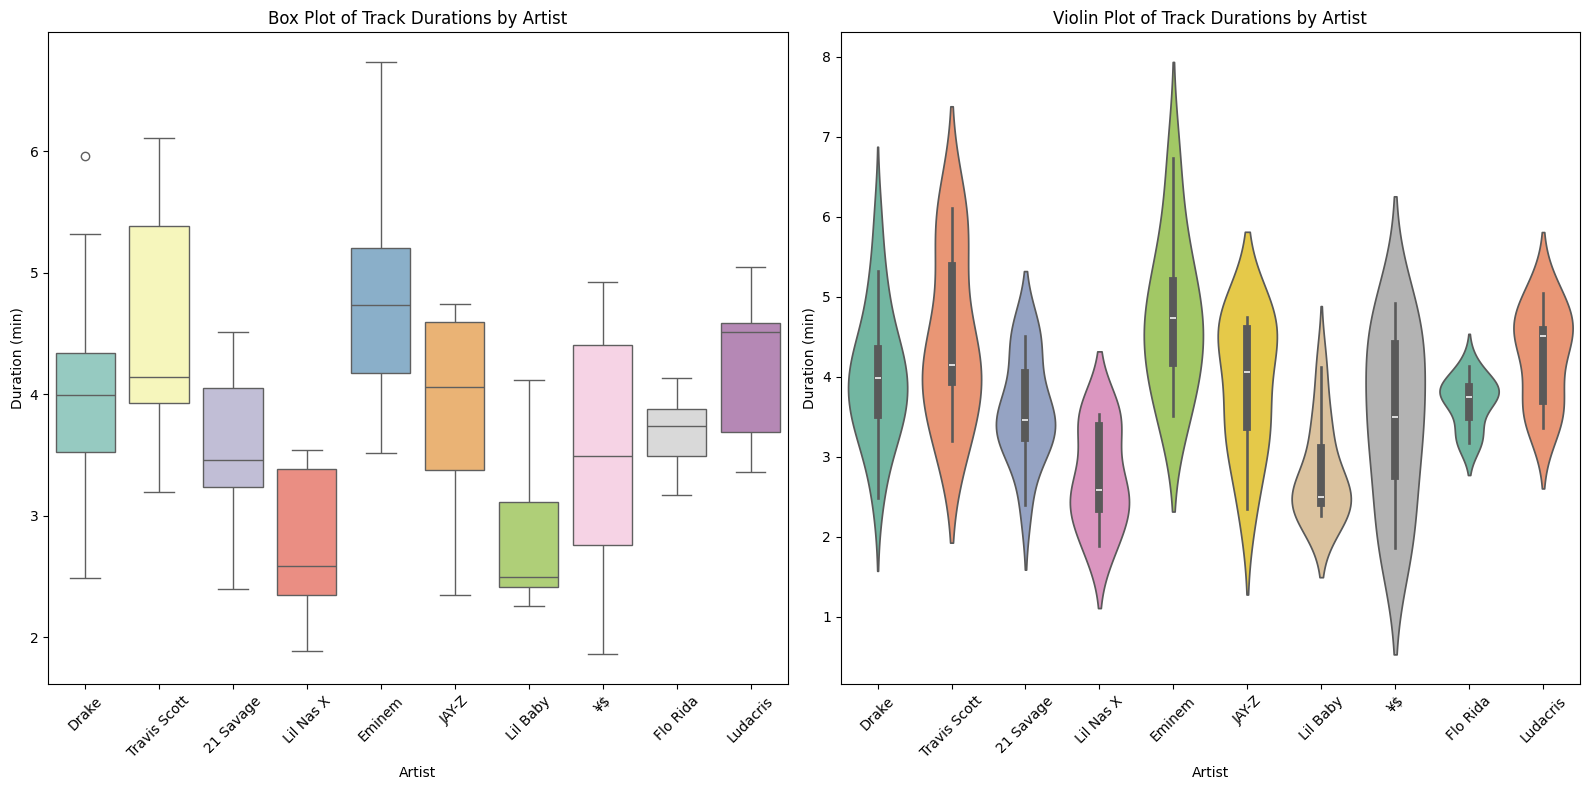

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert duration from milliseconds to minutes for better interpretability
spotify_data['Duration (min)'] = spotify_data['Duration (ms)'] / 60000

# Select the top 10 artists with the most tracks for visualization clarity
top_artists = spotify_data['Artist'].value_counts().head(10).index
filtered_data = spotify_data[spotify_data['Artist'].isin(top_artists)]

# Set up the plot
plt.figure(figsize=(16, 8))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=filtered_data, x='Artist', y='Duration (min)', palette='Set3')
plt.title('Box Plot of Track Durations by Artist')
plt.xticks(rotation=45)
plt.ylabel('Duration (min)')
plt.xlabel('Artist')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=filtered_data, x='Artist', y='Duration (min)', palette='Set2')
plt.title('Violin Plot of Track Durations by Artist')
plt.xticks(rotation=45)
plt.ylabel('Duration (min)')
plt.xlabel('Artist')

plt.tight_layout()
plt.show()


Question 10 - How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

<ipython-input-63-6b2376bd579c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=filtered_data, x='Artist', y='Popularity', palette='Set1', size=4)
<ipython-input-63-6b2376bd579c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_data, x='Artist', y='Popularity', palette='Set2')


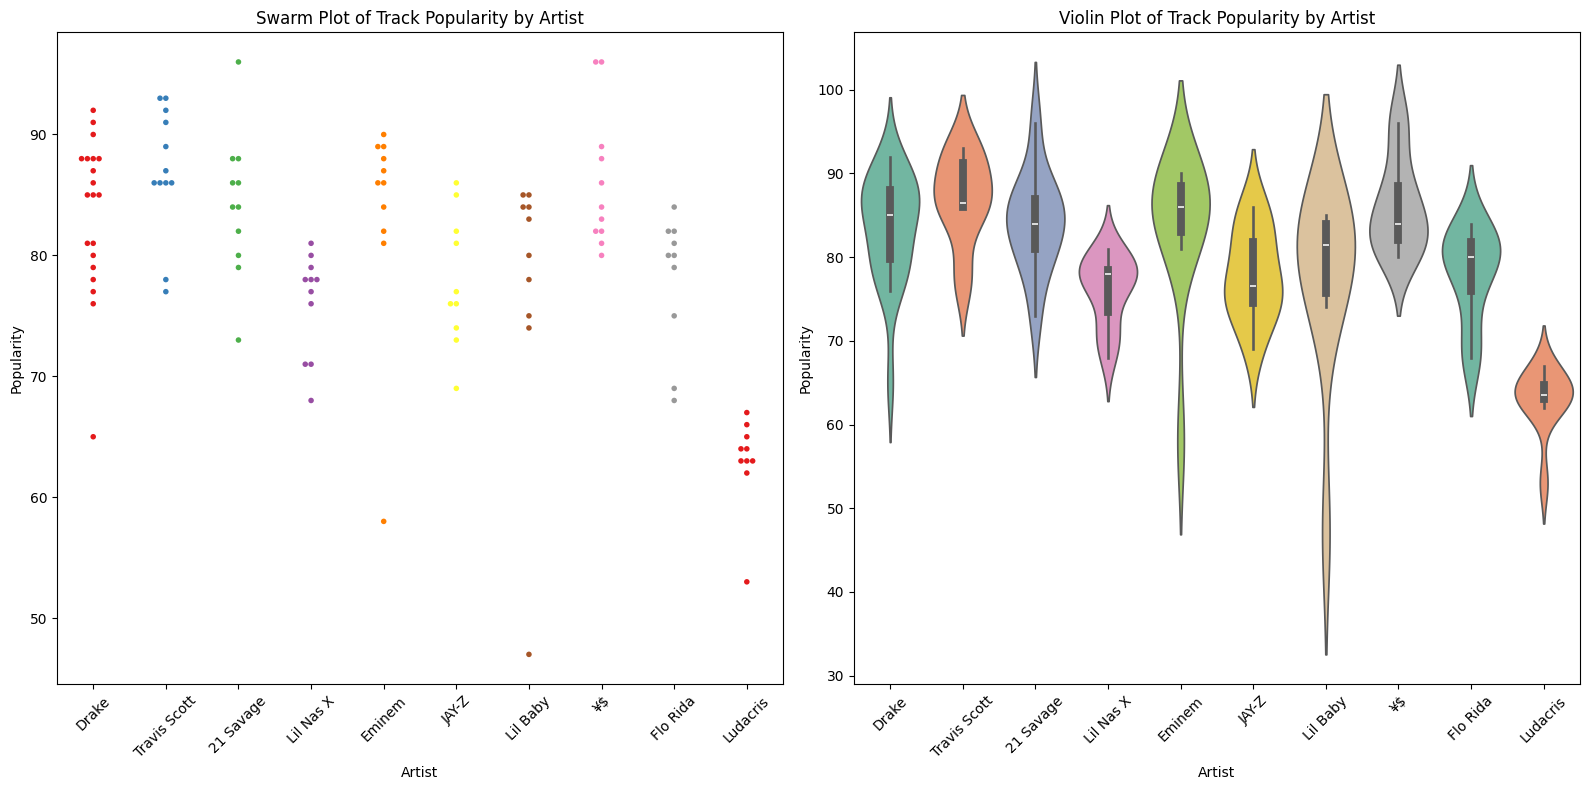

In [63]:
#Answer 10
# Set up the plot for popularity distribution by artist
plt.figure(figsize=(16, 8))

# Swarm plot
plt.subplot(1, 2, 1)
sns.swarmplot(data=filtered_data, x='Artist', y='Popularity', palette='Set1', size=4)
plt.title('Swarm Plot of Track Popularity by Artist')
plt.xticks(rotation=45)
plt.ylabel('Popularity')
plt.xlabel('Artist')

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(data=filtered_data, x='Artist', y='Popularity', palette='Set2')
plt.title('Violin Plot of Track Popularity by Artist')
plt.xticks(rotation=45)
plt.ylabel('Popularity')
plt.xlabel('Artist')

plt.tight_layout()
plt.show()
